The Pima Indians Diabetes Dataset contains medical records of 768 female patients of Pima Indian heritage, aged 21 years or older. The aim is to predict the onset of diabetes based on diagnostic health measurements.

Each record includes features such as:

Number of pregnancies

Glucose level

Blood pressure

BMI

Age


The target column Outcome indicates:

1: Patient has diabetes

0: Patient does not have diabetes

This dataset is commonly used for binary classification problems in machine learning and healthcare prediction research.

Goal (Problem Statement):
To predict whether a woman has diabetes or not based on medical measurements.



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


In [ ]:
df["BloodPressure"].dtype

dtype('float64')

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
(df["BloodPressure"] ==0).sum()

np.int64(0)

In [ ]:
df["BloodPressure"].isnull().sum()

np.int64(0)

In [ ]:
df["Glucose"].isnull().sum()

np.int64(0)

In [ ]:
df.shape

(768, 9)

In [ ]:
df["BloodPressure"].mean()

np.float64(72.40518417462484)

In [ ]:
df["BloodPressure"].median()

72.0

In [ ]:
df["BloodPressure"].mode()

,BloodPressure
0,70.0


In [ ]:
df["BloodPressure"]=df["BloodPressure"].fillna(df["BloodPressure"].median())


In [ ]:
px.box(df, y="BloodPressure")

In [ ]:
df["BloodPressure"]=df["BloodPressure"].replace(0,np.nan)

In [ ]:
import numpy as np

df["Glucose"] = df["Glucose"].replace(0,np.nan)

In [ ]:
(df["Glucose"]==0).sum()

np.int64(0)

In [ ]:
df["Glucose"].median()

117.0

In [ ]:
df["Glucose"].mean()

np.float64(121.65625)

In [ ]:
import plotly.express as px
fig = px.box(df, y="Glucose")
fig.show()

In [ ]:
df["Glucose"] = df["Glucose"].fillna(df["Glucose"].median())

In [ ]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test_scaled)


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7142857142857143

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



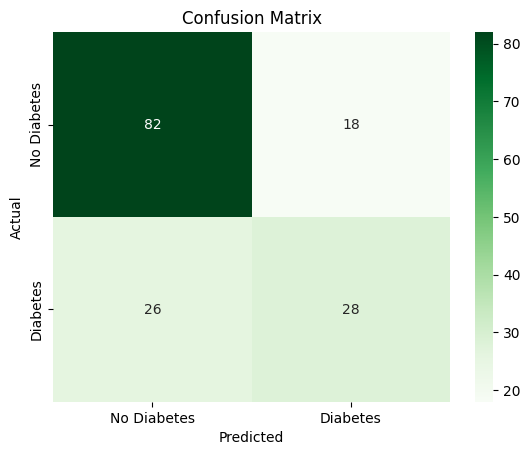

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


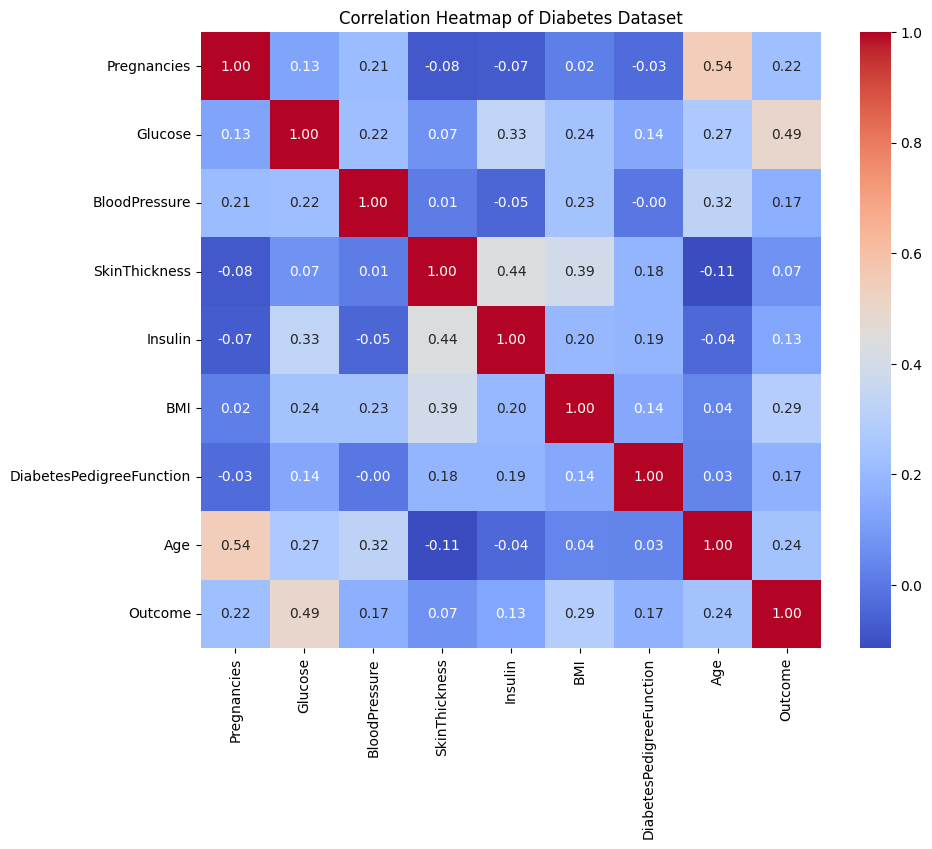

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Diabetes Dataset')
plt.show()

In [ ]:
outcome_counts = df['Outcome'].value_counts(normalize=True) * 100
print("Outcome Percentage:")
print(outcome_counts)

Outcome Percentage:
Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64
